### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
#Rename the 'passanger' column as it's misspelt
data = data.rename(columns={'passanger':'passenger'})

2. Investigate the dataset for missing or problematic data.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


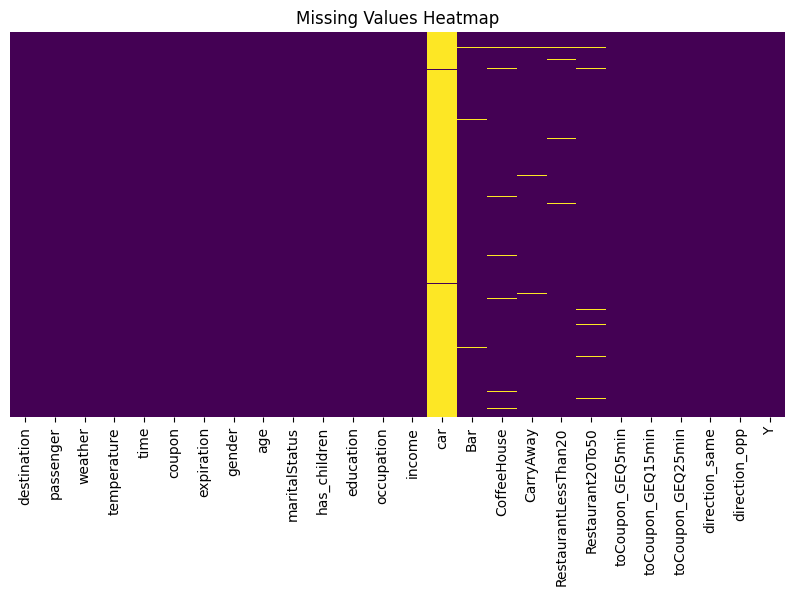

In [ ]:
# Visualizing Missing Values
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Drop columns with more than 30% missing values
data = data.dropna(thresh=len(data) * 0.7, axis=1)


In [ ]:
# Fill remaining missing values with mode for categorical columns

for col in data.select_dtypes(include=['object']).columns:
    # Check if the mode series is empty before accessing element 0
    if not data[col].mode().empty:
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        # Handle the case when mode is empty, e.g., fill with a default value
        data[col] = data[col].fillna('Unknown') # Or any other suitable value

In [ ]:
#Remove duplicate rows
data = data.drop_duplicates()

In [ ]:
# Convert categorical variables to lowercase and strip whitespace
data = data.map(lambda x: x.strip().lower() if isinstance(x, str) else x)


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
total_coupons_accepted = (data['Y'].value_counts(normalize = True)[1])*100
print(f"Propartion of the total observations that chose to accept the coupon : {total_coupons_accepted : .2f}%")

Propartion of the total observations that chose to accept the coupon :  56.76%


5. Use a bar plot to visualize the `coupon` column.

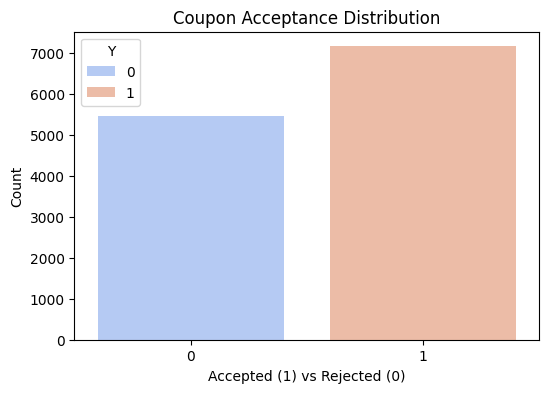

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data, x='Y', palette='coolwarm', hue = 'Y')
plt.title("Coupon Acceptance Distribution")
plt.xlabel("Accepted (1) vs Rejected (0)")
plt.ylabel("Count")
plt.show()

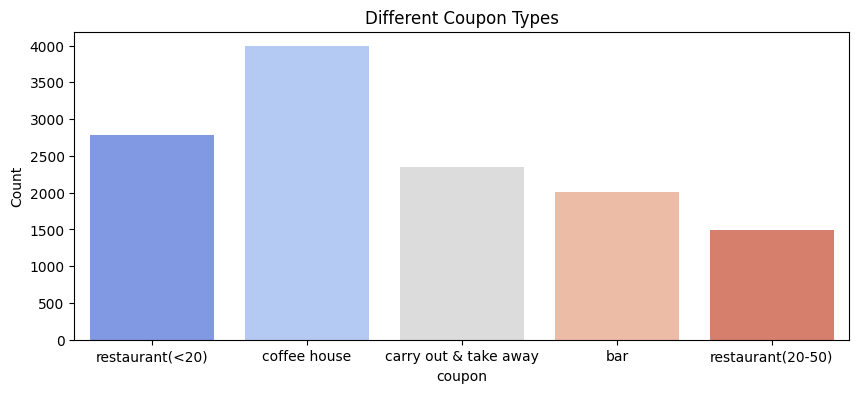

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data, x='coupon', palette='coolwarm', hue = 'coupon')
plt.title("Different Coupon Types")
plt.ylabel("Count")
plt.show()

6. Use a histogram to visualize the temperature column.

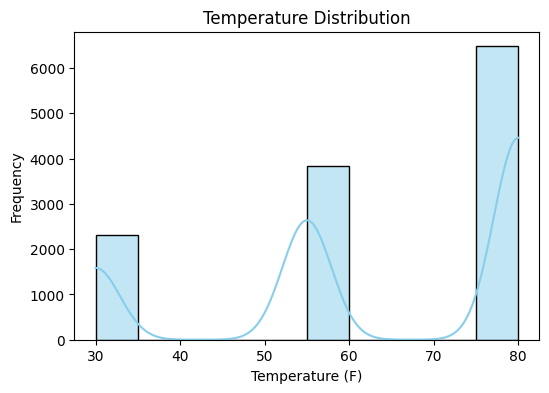

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data['temperature'], bins=10, kde=True, color='skyblue')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.show()

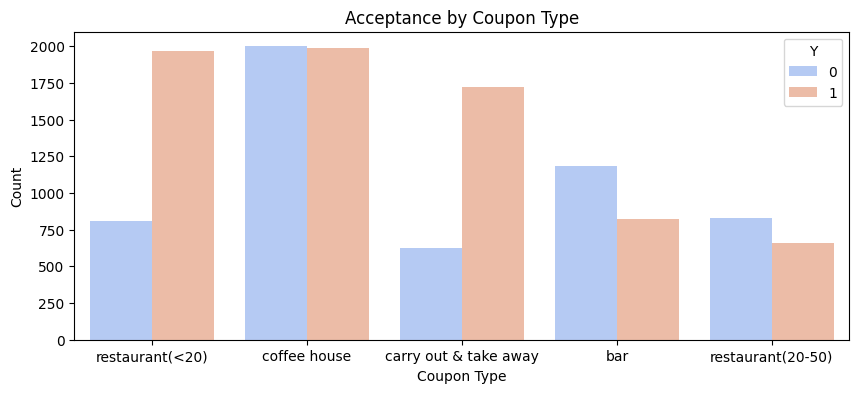

In [ ]:
# Bar Plot: Acceptance by Coupon Type
plt.figure(figsize=(10, 4))
sns.countplot(data, x='coupon', hue='Y', palette='coolwarm')
plt.title("Acceptance by Coupon Type")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

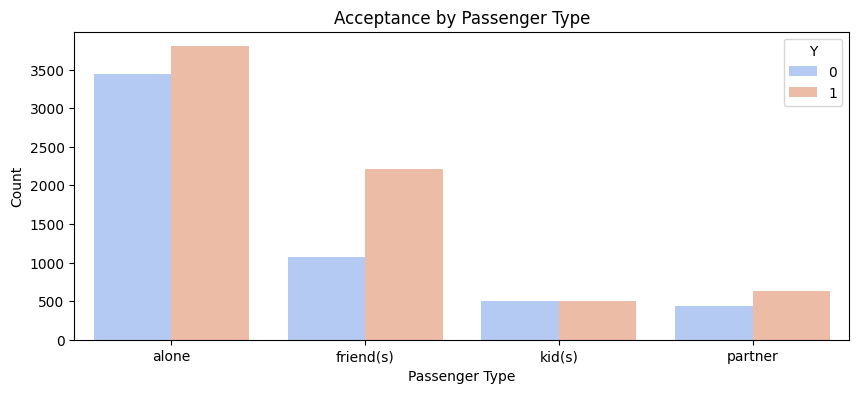

In [ ]:
# Bar Plot: Acceptance by Passenger Type
plt.figure(figsize=(10, 4))
sns.countplot(data, x='passenger', hue='Y', palette='coolwarm')
plt.title("Acceptance by Passenger Type")
plt.xlabel("Passenger Type")
plt.ylabel("Count")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
bar_coupons_df = data.query('coupon == "bar"')
print("Bar Coupons DataFrame:")
bar_coupons_df.head()

Bar Coupons DataFrame:


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,no urgent place,kid(s),sunny,80,10am,bar,1d,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,home,alone,sunny,55,6pm,bar,1d,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,work,alone,sunny,55,7am,bar,1d,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,no urgent place,friend(s),sunny,80,10am,bar,1d,male,21,single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,home,alone,sunny,55,6pm,bar,1d,male,21,single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [ ]:
accepted_proportion = bar_coupons_df['Y'].value_counts(normalize=True)[1]*100
print(f"Proportion of Bar Coupons Accepted: {accepted_proportion:.2f}%")
bar_coupons_df = data[data['coupon'] == 'bar']
print("\nBar Coupons DataFrame:")
bar_coupons_df.head()

Proportion of Bar Coupons Accepted: 41.00%

Bar Coupons DataFrame:


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,no urgent place,kid(s),sunny,80,10am,bar,1d,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,home,alone,sunny,55,6pm,bar,1d,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,work,alone,sunny,55,7am,bar,1d,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,no urgent place,friend(s),sunny,80,10am,bar,1d,male,21,single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,home,alone,sunny,55,6pm,bar,1d,male,21,single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
#ordering the categories
#'never' < 'less1' < '1~3' < '4~8' < 'gt8'

pd.options.mode.copy_on_write = True

bar_coupons_df['Bar'] = pd.Categorical(
    bar_coupons_df['Bar'],
    categories=['never', 'less1', '1~3', '4~8', 'gt8'],
    ordered=True
)

few_bar_visits_df = bar_coupons_df.query('Bar <= "1~3"', engine='python')
more_bar_visits_df = bar_coupons_df.query('Bar > "1~3"', engine='python')

few_bar_acceptance_rate = few_bar_visits_df['Y'].value_counts(normalize=True)[1]*100
more_bar_acceptance_rate = more_bar_visits_df['Y'].value_counts(normalize=True)[1]*100

print(f"Acceptence rate for 3 or fewer bar visits: {few_bar_acceptance_rate:.2f}%")
print(f"Acceptence rate for more than 3 bar visits: {more_bar_acceptance_rate:.2f}%")



Acceptence rate for 3 or fewer bar visits: 37.05%
Acceptence rate for more than 3 bar visits: 76.88%


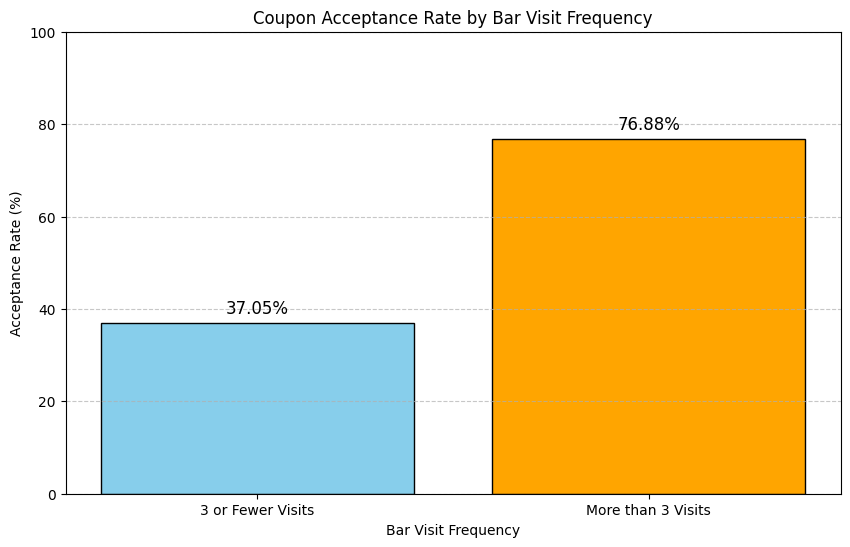

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar graph
labels = ['3 or Fewer Visits', 'More than 3 Visits']
acceptance_rates = [few_bar_acceptance_rate, more_bar_acceptance_rate]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, acceptance_rates, color=['skyblue', 'orange'], edgecolor='black')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate (%)')
plt.title('Coupon Acceptance Rate by Bar Visit Frequency')
plt.ylim(0, 100)  # Set y-axis range to 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display acceptance rate values on top of each bar
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 2, f"{rate:.2f}%", ha='center', color='black', fontsize=12)

plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
#acceptance rate of drivers who go to a bar more than once a month and are over the age of 25
bar_visit_age_df = bar_coupons_df.query('(Bar >= "1~3") and (age > "25")', engine='python')
bar_visit_age_acceptance_rate = bar_visit_age_df['Y'].value_counts(normalize=True)[1]*100

#acceptance rate of other drivers
other_bar_visit_df = bar_coupons_df.query('(Bar < "1~3") and (age <= "25")', engine='python')
other_bar_visit_acceptance_rate = other_bar_visit_df['Y'].value_counts(normalize=True)[1]*100

print(f"Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: {bar_visit_age_acceptance_rate:.2f}%")
print(f"Acceptance rate of other bar visits: {other_bar_visit_acceptance_rate:.2f}%")

Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: 68.84%
Acceptance rate of other bar visits: 38.65%


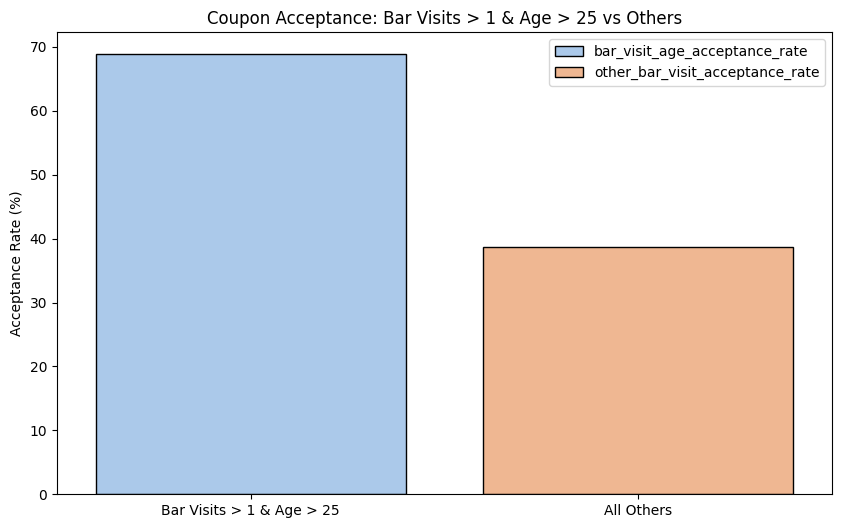

In [ ]:
# Bar Plot Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['Bar Visits > 1 & Age > 25', 'All Others'], y=[bar_visit_age_acceptance_rate, other_bar_visit_acceptance_rate], palette='pastel', edgecolor='black', hue=['bar_visit_age_acceptance_rate', 'other_bar_visit_acceptance_rate'])
plt.ylabel('Acceptance Rate (%)')
plt.title("Coupon Acceptance: Bar Visits > 1 & Age > 25 vs Others")
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
#acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
bar_visit_not_kid_occupation_df = bar_coupons_df.query('(Bar >= "1~3") and (passenger != "kid(s)") and (occupation != "farming fishing & forestry")', engine='python')
bar_visit_not_kid_occupation_acceptance_rate = bar_visit_not_kid_occupation_df['Y'].value_counts(normalize=True)[1]*100

#acceptance rate of other dirvers
bar_coupons_acceptance_rate = bar_coupons_df['Y'].value_counts(normalize=True)[1]*100

print(f"Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {bar_visit_not_kid_occupation_acceptance_rate:.2f}%")
print(f"Acceptance rate of other drivers: {bar_coupons_acceptance_rate:.2f}%")


Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.32%
Acceptance rate of other drivers: 41.00%


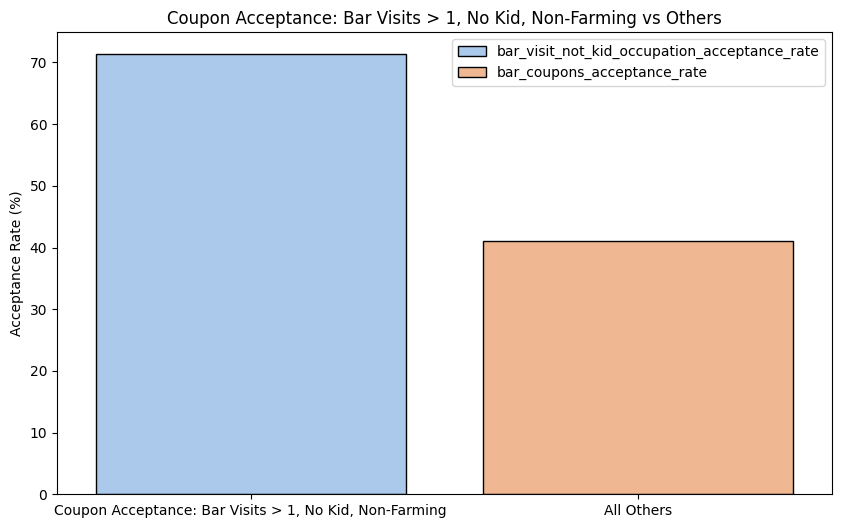

In [ ]:
# Bar Plot Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['Coupon Acceptance: Bar Visits > 1, No Kid, Non-Farming', 'All Others'], y=[bar_visit_not_kid_occupation_acceptance_rate, bar_coupons_acceptance_rate], palette='pastel', edgecolor='black', hue=['bar_visit_not_kid_occupation_acceptance_rate', 'bar_coupons_acceptance_rate'])
plt.ylabel('Acceptance Rate (%)')
plt.title("Coupon Acceptance: Bar Visits > 1, No Kid, Non-Farming vs Others")
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
bar_coupons_df['Bar'] = pd.Categorical(
    bar_coupons_df['Bar'],
    categories=['never', 'less1', '1~3', '4~8', 'gt8'],
    ordered=True
)

condition1_df = bar_coupons_df.query('Bar >= "1~3" and passenger != "kid(s)" and maritalStatus != "widowed"', engine='python')
condition2_df = bar_coupons_df.query('Bar >= "1~3" and age < "30"', engine='python')
condition3_df = bar_coupons_df.query('Bar >= "4~8" and income <= "$37500 - $49999"', engine='python')

condition1_acceptance_rate = condition1_df['Y'].value_counts(normalize=True)[1]*100
condition2_acceptance_rate = condition2_df['Y'].value_counts(normalize=True)[1]*100
condition3_acceptance_rate = condition3_df['Y'].value_counts(normalize=True)[1]*100


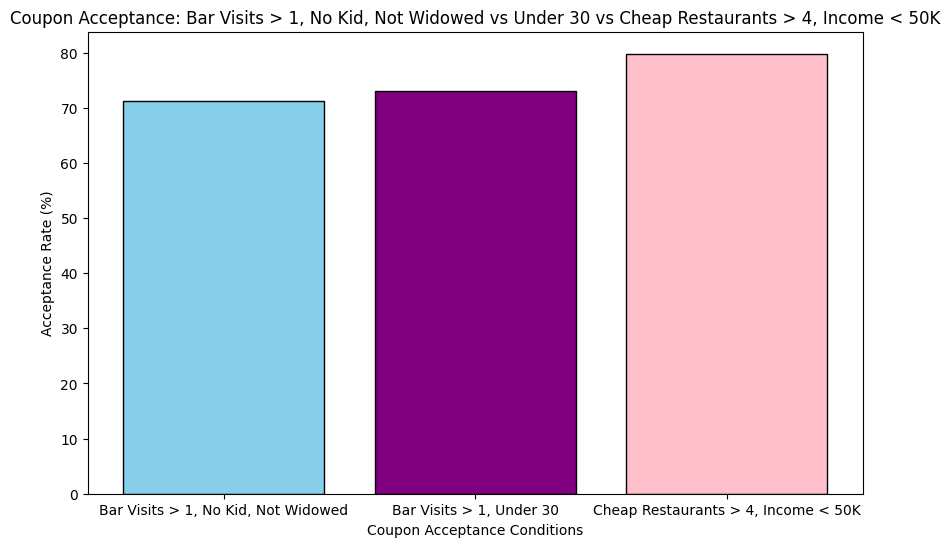

In [ ]:

# Data for the bar graph
labels = ['Bar Visits > 1, No Kid, Not Widowed', 'Bar Visits > 1, Under 30', 'Cheap Restaurants > 4, Income < 50K']
acceptance_rates = [condition1_acceptance_rate, condition2_acceptance_rate, condition3_acceptance_rate]

plt.figure(figsize=(10, 6))
plt.bar(labels,acceptance_rates, color=['skyblue', 'purple', 'pink'], edgecolor='black')
plt.xlabel('Coupon Acceptance Conditions')
plt.ylabel('Acceptance Rate (%)')
plt.title("Coupon Acceptance: Bar Visits > 1, No Kid, Not Widowed vs Under 30 vs Cheap Restaurants > 4, Income < 50K")
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Hypotheses on Drivers Who Accepted Bar Coupons:**
Based on the observations and comparisons, the following hypotheses can be made:

1. **Frequent Bar-Goers are More Likely to Accept Coupo**ns:

*   Drivers who go to bars more than once a month are more likely to accept bar coupons than those who visit less frequently.

*   This suggests a familiarity and comfort with the bar environment, making the coupon more appealing.

2. **Social Context Matters:**

*   Acceptance rates are higher among drivers who were not accompanied by kids.
*   This indicates that the presence of children might reduce the likelihood of visiting a bar, impacting coupon acceptance.

3. **Demographic Influences:**

*   Younger drivers (under 30) and those above 25 but visiting bars more than once a month showed higher acceptance rates.
*   This suggests that younger adults and social drinkers are more receptive to bar promotions.

4. **Lifestyle and Income Impact:**

*   Drivers who frequently visit low-cost restaurants and have an income under
$50K are also more likely to accept bar coupons.
*   This could indicate budget-conscious behaviors and a tendency to take advantage of deals.

5. **Occupation and Marital Status Play a Role:**

*   Occupations outside of farming, fishing, or forestry and drivers who are not widowed showed higher acceptance rates.
*   This suggests that lifestyle and social dynamics linked to occupation and marital status influence decisions.




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Coffee House Coupon Analysis**

In [ ]:
# Investigate Coffee House Coupons
coffee_house_coupons_df = data.query('coupon == "coffee house"', engine='python')
print("Coffee House Coupons DataFrame:")
coffee_house_coupons_df.head()

Coffee House Coupons DataFrame:


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,no urgent place,friend(s),sunny,80,10am,coffee house,2h,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,no urgent place,friend(s),sunny,80,2pm,coffee house,2h,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,no urgent place,friend(s),sunny,80,2pm,coffee house,1d,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,no urgent place,kid(s),sunny,55,6pm,coffee house,2h,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,home,alone,sunny,80,6pm,coffee house,2h,female,21,unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [ ]:
# Proportion of Coffee House Coupons Accepted
coffee_house_coupons_accepted_rate = coffee_house_coupons_df['Y'].value_counts(normalize=True)[1]*100
print(f"Proportion of Coffee House Coupons Accepted: {coffee_house_coupons_accepted_rate:.2f}%")

Proportion of Coffee House Coupons Accepted: 49.86%


Text(0, 0.5, 'Count')

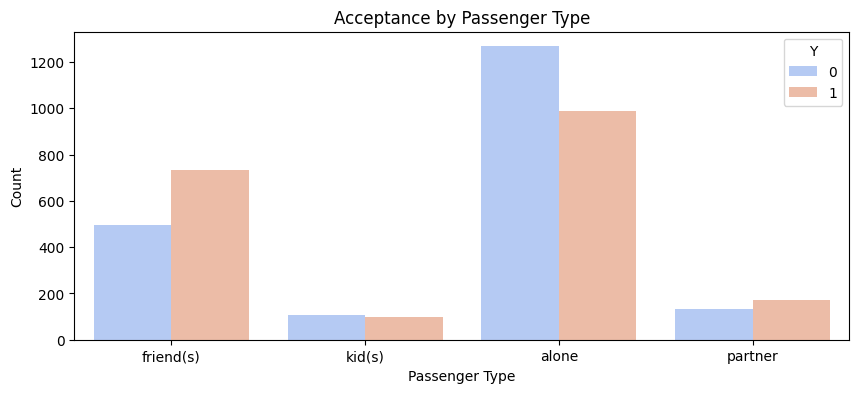

In [ ]:
# Acceptance by Passenger Type
plt.figure(figsize=(10, 4))
sns.countplot(coffee_house_coupons_df, x='passenger', hue='Y', palette='coolwarm')
plt.title("Acceptance by Passenger Type")
plt.xlabel("Passenger Type")
plt.ylabel("Count")

Text(0.5, 0, 'Time of the Day')

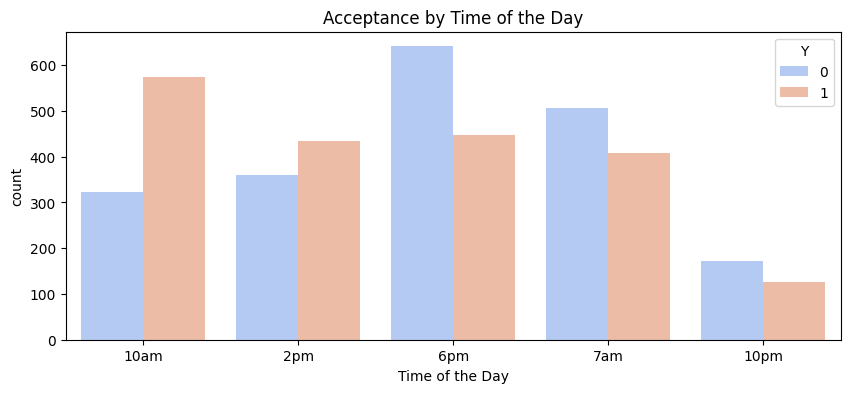

In [ ]:
# Acceptance by Time of the Day
plt.figure(figsize=(10, 4))
sns.countplot(coffee_house_coupons_df, x='time', hue='Y', palette='coolwarm')
plt.title("Acceptance by Time of the Day")
plt.xlabel("Time of the Day")

Text(0.5, 1.0, 'Age vs Coffee House Coupon Acceptance')

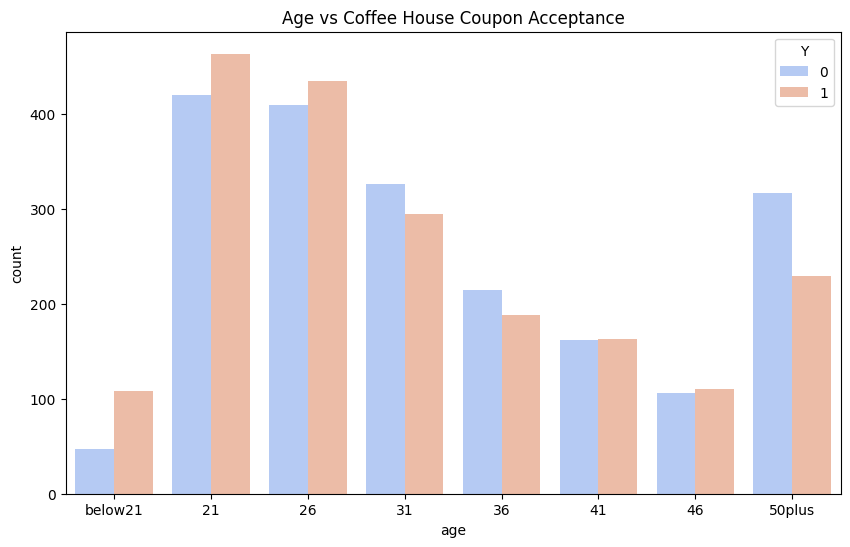

In [ ]:
# countplot: Age vs Coffee House Coupon Acceptance
coffee_house_coupons_df['age'] = pd.Categorical(
    coffee_house_coupons_df['age']
    , categories=['below21','21', '26', '31', '36', '41', '46', '50plus'],
    ordered=True
)

plt.figure(figsize=(10, 6))
sns.countplot(data=coffee_house_coupons_df, x='age', palette='coolwarm', hue='Y')
plt.title("Age vs Coffee House Coupon Acceptance")

Text(0.5, 1.0, 'Income Level vs Coffee House Coupon Acceptance')

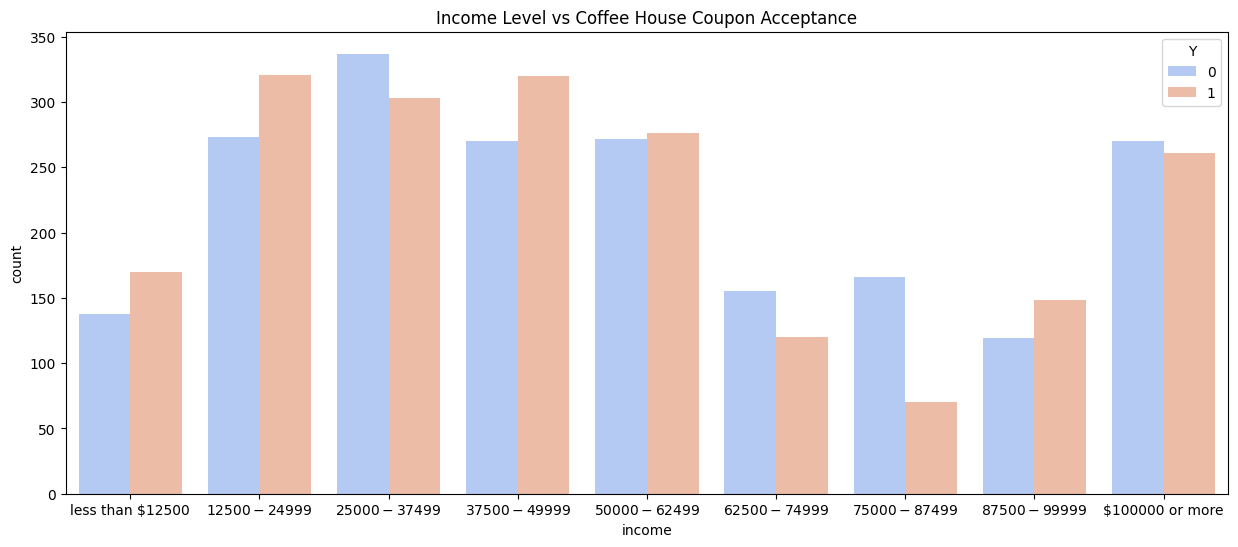

In [ ]:
# Acceptance by Income Level
coffee_house_coupons_df['income'] = pd.Categorical(
    coffee_house_coupons_df['income']
    , categories=['less than $12500','$12500 - $24999', '$25000 - $37499', '$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or more'],
    ordered=True
)

plt.figure(figsize=(15, 6))
sns.countplot(data=coffee_house_coupons_df, x='income', palette='coolwarm', hue='Y')
plt.title("Income Level vs Coffee House Coupon Acceptance")

Text(0.5, 0, 'Weather Condition')

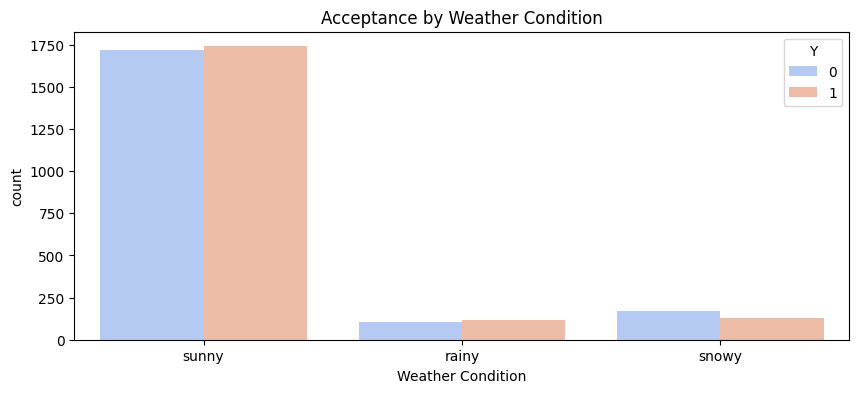

In [ ]:
# Acceptance by Weather Condition
plt.figure(figsize=(10, 4))
sns.countplot(coffee_house_coupons_df, x='weather', hue='Y', palette='coolwarm')
plt.title("Acceptance by Weather Condition")
plt.xlabel("Weather Condition")

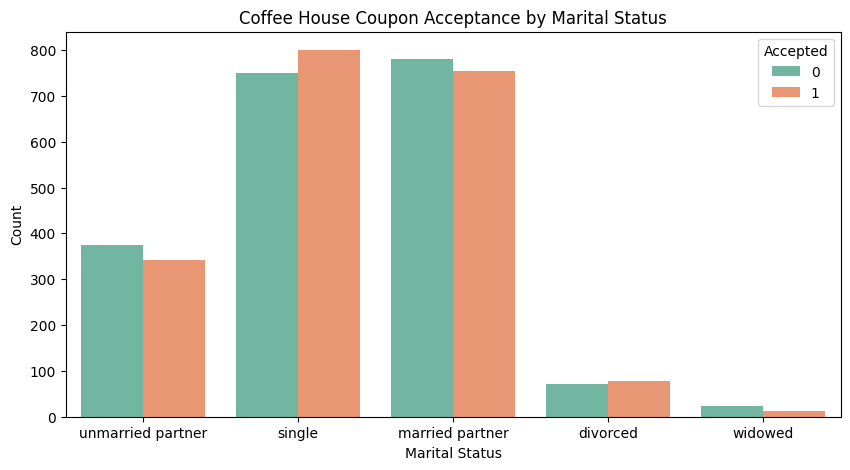

In [ ]:
# Acceptance by Marital Status
plt.figure(figsize=(10,5))
sns.countplot(data = coffee_house_coupons_df, x='maritalStatus', hue='Y', palette='Set2')
plt.title("Coffee House Coupon Acceptance by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Accepted")
plt.show()

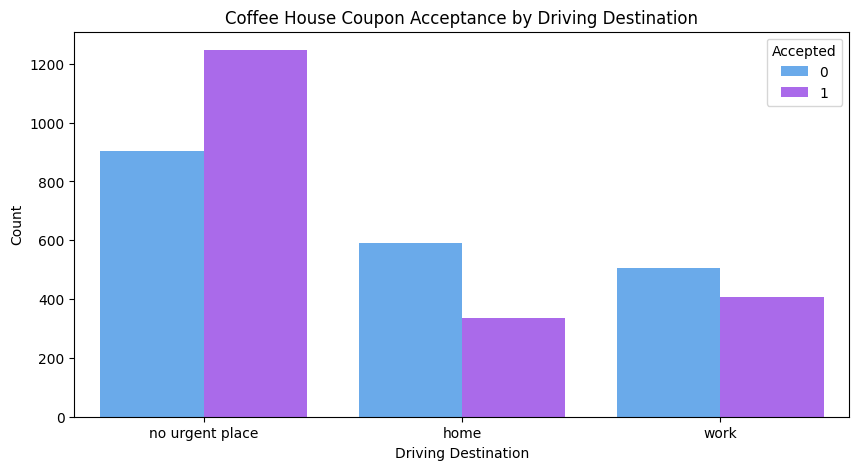

In [ ]:
# Acceptance by Driving Destination
plt.figure(figsize=(10,5))
sns.countplot(data = coffee_house_coupons_df, x='destination', hue='Y', palette='cool')
plt.title("Coffee House Coupon Acceptance by Driving Destination")
plt.xlabel("Driving Destination")
plt.ylabel("Count")
plt.legend(title="Accepted")
plt.show()

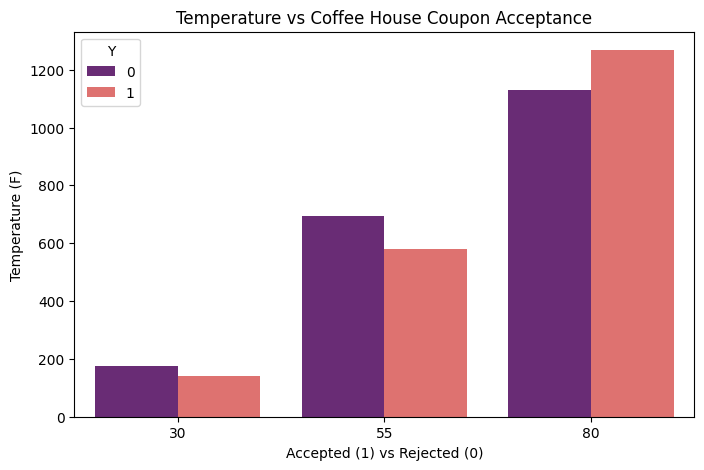

In [ ]:
# Acceptance by Temperature
plt.figure(figsize=(8,5))
sns.countplot(data=coffee_house_coupons_df, x='temperature', palette='magma', hue='Y')
plt.title("Temperature vs Coffee House Coupon Acceptance")
plt.xlabel("Accepted (1) vs Rejected (0)")
plt.ylabel("Temperature (F)")
plt.show()

In [ ]:
# Multiple Condition Comparison: High Income, Frequent Visits, No Kids

coffee_house_coupons_df['CoffeeHouse'] = pd.Categorical(
    coffee_house_coupons_df['CoffeeHouse'],
    categories=['never', 'less1', '1~3', '4~8', 'gt8'],
    ordered=True
)
high_income_coffe_house_visits = coffee_house_coupons_df.query('(income >= "$75000 - $87499") and (CoffeeHouse >= "1~3") and (passenger != "kid(s)")', engine='python')
other_coffe_house_visits = coffee_house_coupons_df.query('(income < "$75000 - $87499") or (CoffeeHouse < "1~3") or (passenger == "kid(s)")', engine='python')

high_income_coffe_house_visits_acceptance_rate = high_income_coffe_house_visits['Y'].value_counts(normalize=True)[1]*100
other_coffe_house_visits_acceptance_rate = other_coffe_house_visits['Y'].value_counts(normalize=True)[1]*100

print(f"Acceptance Rate for High Income, Frequent Visits, No Kids: {high_income_coffe_house_visits_acceptance_rate:.2f}%")
print(f"Acceptance Rate for All Others: {other_coffe_house_visits_acceptance_rate:.2f}%")


Acceptance Rate for High Income, Frequent Visits, No Kids: 62.87%
Acceptance Rate for All Others: 48.25%


Text(0.5, 1.0, 'Coffee House Coupon Acceptance: High Income & Frequent Visits vs Others')

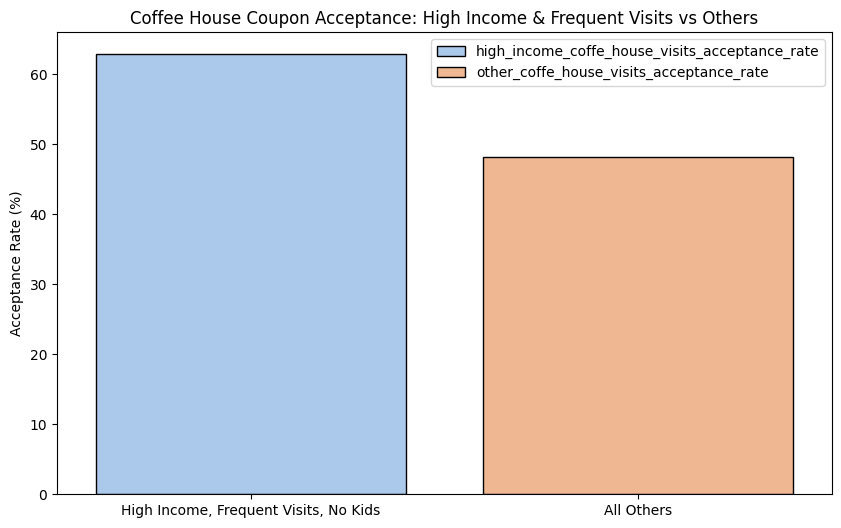

In [ ]:
# Bar Plot Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['High Income, Frequent Visits, No Kids', 'All Others'], y=[high_income_coffe_house_visits_acceptance_rate,other_coffe_house_visits_acceptance_rate], palette='pastel', edgecolor='black', hue=['high_income_coffe_house_visits_acceptance_rate', 'other_coffe_house_visits_acceptance_rate'])
plt.ylabel('Acceptance Rate (%)')
plt.title('Coffee House Coupon Acceptance: High Income & Frequent Visits vs Others')

**Social Influence:**
* Drivers are more likely to accept coffee house coupons when with friends,
possibly due to socializing motives.

**Time based acceptance rate:**
* The highest proportion of coupon acceptance occurs at 10 AM. This could indicate that coffee house visits are appealing during mid-morning, likely for a coffee break or a quick meetup.
*Both the count and acceptance rate are lowest at 10 PM. This likely reflects reduced coffee consumption at night, possibly due to concerns about sleep disruption.

**Social and Lifestyle based acceptance rate:**
* The age groups 21 and 26 show the highest coupon acceptance rates.This age group likely values social experiences at coffee houses, possibly due to college lifestyle or social gatherings.
* Acceptance is lowest for the 46 and 50plus groups. Older adults might have more established routines or different spending habits, making them less likely to accept spontaneous coupons.

**Financial Comfort and Discretionary Spending:**
* The highest coupon acceptance rates are observed in the middle-income brackets, particularly between $12500 - $62499. These groups might have disposable income to spend on coffee houses but are also attracted to discounts and promotions, making them more likely to accept coupons.
* Acceptance rates decrease sharply for the higher income groups.Individuals in these income brackets may not be as motivated by cost-saving offers, or they may prefer premium or exclusive dining experiences over discounted coffee house visits.

**Weather-Dependent coupon acceptance:**
* People are more mobile and willing to explore dining options on sunny days, resulting in higher coupon engagement.
* Inclement weather conditions (rainy and snowy) discourage detours, leading to reduced coupon usage.

**Social Lifestyle and coupon acceptance:**
* Singles and married partners engage more in social activities, increasing the likelihood of accepting coffee house coupons.
* Unmarried partners show balanced acceptance due to shared decision-making.

**Coffee House Coupon Acceptance by Driving Destination:**
* Coupon acceptance is higher when individuals have flexible schedules (e.g., no urgent place to go), as they are more open to spontaneous stops.
* Conversely, structured schedules (e.g., going to work or home) reduce acceptance rates.
* Individuals going to work who accept the coupon may be seeking a quick refreshment before starting their tasks.
* This could be a strategic marketing opportunity to target morning commuters.

**Weather Comfort acceptance rate:**
* People are more likely to accept coffee house coupons when the weather is comfortable or warm (80°F), as it encourages social outings or leisure stops.
* In contrast, colder temperatures (30°F) discourage unnecessary stops as people prefer to reach their destinations quickly.

**High Income, Frequent Visits, No Kids:**
* High-income individuals with frequent coffee house visits likely see coffee outings as part of their lifestyle rather than a luxury, leading to higher coupon acceptance.
* Those without children have more flexibility in their schedules, making spontaneous stops more feasible.
* Individuals with higher income are less constrained by budgetary considerations, increasing the likelihood of accepting coupons for non-essential items like coffee.
* Frequent coffee house visitors are already inclined to make purchases, making them more receptive to coupons that align with their existing habits.